# Early Universe Physical Cosmology
#### Caltech - ph2c (Spring 2015)
https://piazza.com/caltech/spring2015/ph2c/home
### Intro to Statistical Physics and Thermodynamics

In [7]:
# Loading needed libraries and setting up preferences
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.constants as const


# Update the matplotlib configuration parameters:
plt.rcParams.update({'font.size': 22,
                     'font.family': 'sans',
                     'figure.figsize': (10, 8),
                     'axes.grid': True,
                     'grid.color': '#555555'})


## Comparison of COBE Observations with Blackbody formula

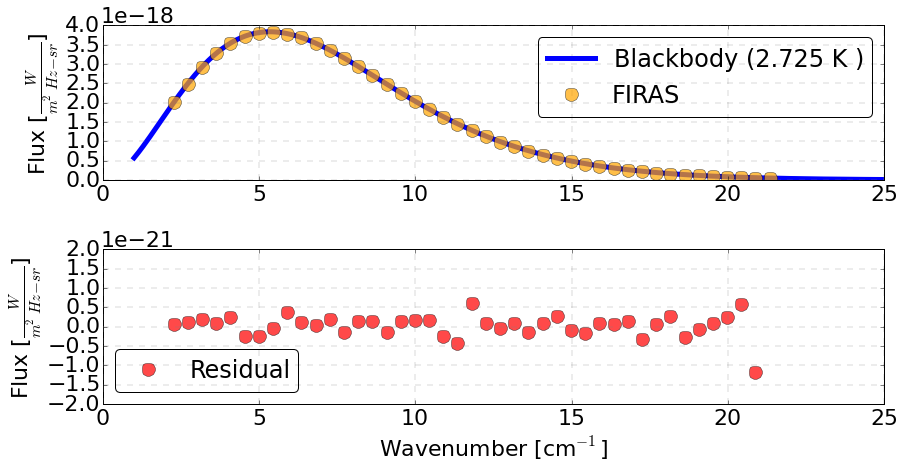

In [15]:
# load the data from the FIRAS instrument on the COBE satellite
# http://lambda.gsfc.nasa.gov/product/cobe/firas_monopole_get.cfm
[nu, S, res, sigma, Sgalaxy] = np.loadtxt('firas_monopole_spec_v1.txt', unpack=True)

h = const.h
c = const.c
kB = const.k

def Snu(nu, T):
    y = (1/c)*(2*h * nu**3 * c**2) / (np.exp(h * c * nu/ (kB*T)) - 1)
    return y

nuu = np.linspace(1, 25, 333) *100

fig = plt.figure(figsize=(13,7))
ax1 = plt.subplot(211)

plt.plot(nuu/100, Snu(nuu, 2.725), color='Blue', lw=5, label=r'Blackbody (2.725 K )')
plt.plot(nu, S*1e-20, linestyle='None', marker='o', markersize=13, mfc='Orange',alpha=0.71, label='FIRAS')

plt.grid(color='gray', alpha=0.15, linestyle='dashed', linewidth=2)
plt.ylabel(r'Flux [$\frac{W}{m^2 Hz - sr}$]')

plt.legend(loc='best', fontsize=24, numpoints=1, fancybox=True)

ax2 = plt.subplot(212)
plt.plot(nu, S*1e-20 - Snu(nu*100, 2.725), linestyle='None', 
         marker='o', markersize=13, mfc='Red',alpha=0.71,
         label='Residual')
plt.ylim((-2e-21, 2e-21))
plt.grid(color='gray', alpha=0.15, linestyle='dashed', linewidth=2)
plt.ylabel(r'Flux [$\frac{W}{m^2 Hz - sr}$]')
plt.xlabel(r'Wavenumber [cm$^{-1}$]')
plt.legend(loc='lower left', fontsize=24, numpoints=1, fancybox=True)

plt.tight_layout()
plt.savefig("COBE_FIRAS.pdf", bbox_inches='tight')
plt.show()

### Relative Abundance of neutrons and protons

m_n - (m_p + m_e) = 0.782 MeV


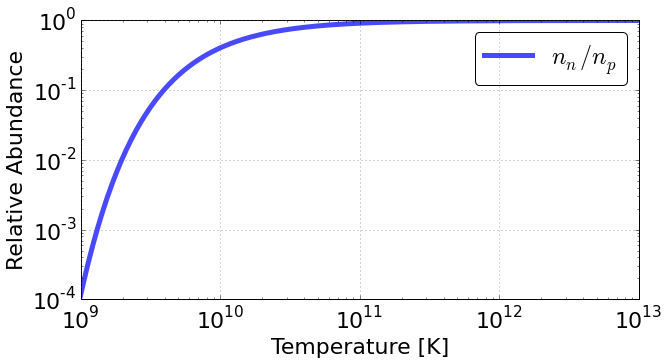

In [14]:
deltaM = (const.m_n - const.m_p - const.m_e)*const.c**2
print 'm_n - (m_p + m_e) = ' + str(round(deltaM/const.e/1e6,3)) + " MeV"

T = np.logspace(13, 9, 233) 
rel_n = np.exp(-deltaM/(kB * T))


fig = plt.figure(figsize=(10,5))

plt.loglog(T, rel_n, linestyle='-', lw=5, alpha=0.71, label='$n_n/n_p$')

plt.ylabel('Relative Abundance')
plt.xlabel('Temperature [K]')

plt.legend(loc='best', fontsize=24, numpoints=1, fancybox=True)

plt.savefig("NeutronAbundance.pdf", bbox_inches='tight')
plt.show()

### Further Reading
1. "Physical Cosmology", by PJE Peebles
1. ["Statistical Mechanics", by Pathria](https://books.google.com/books?id=KdbJJAXQ-RsC&dq=pathria+statistical+mechanics&source=gbs_navlinks_s)
1. http://en.wikipedia.org/wiki/Big_Bang_nucleosynthesis
1. [The Saha Equation](http://www.cambridge.org/resources/0521846560/7706_Saha%20equation.pdf), by Hale Bradt (MIT)
1. [Ned Wright's Cosmology Tutorial](http://www.astro.ucla.edu/~wright/cosmoall.htm)
1. [Cole Miller's BBN Lecture notes](http://www.astro.umd.edu/~miller/teaching/astr422/lecture24.pdf)
1. [Jim Brau's LEcture Notes](http://pages.uoregon.edu/jimbrau/astr123/Notes/Chapter27.html)

In [88]:
print $\mu$

SyntaxError: invalid syntax (<ipython-input-88-1772f43a5483>, line 1)